<a href="https://colab.research.google.com/github/SPlearning27/Cohort-18-Projects/blob/main/ver2_2_Proj4__Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song. It might help to imagine that the song will not be released for several weeks.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



# Questions:
- What made those songs popular??
    - Does the dancebility along with the date release impact the popularity of the songs (For example, some songs with high scores of dancebility were lauched during the new year season to get more popularity?
    - Artist followers
- Which features have high impact on the popularity of the new songs?
**Used only essential features**
    - Release date: Mon-Sun?
    - Features like danceability, loudness, valence, and energy can influence a song's appeal and, consequently, its popularity
    - The popularity of the artist's profile: number of followers
    - Streaming


# About popularity:
Spotify's "popularity" score is a hidden metric, ranging from 0 to 100, that reflects how popular a track, album, or artist is relative to others on the platform.

> Popularity scores:

0-20:
Likely indicates a new or niche artist, or a track that hasn't gained significant traction yet.

21-50:
Suggests a growing fan base and consistent interest in certain tracks.

51-80:
Indicates strong engagement, a solid fanbase, and likely playlist inclusion.

81-100:
Represents peak popularity, with significant buzz, widespread listenership, and frequent playlist placement.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
matplotlib.style.use('ggplot')
from functools import reduce

In [3]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: I/7p/GkS7n2y7qDA9NovmmHgAQkI6rJiRNzCL2bByAByql6iWTwfZPb4kIHYGZUC1jODwoz+xdo=
x-amz-request-id: DWPQRN7KQY948T4V
Date: Sun, 06 Jul 2025 04:08:42 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [4]:
!curl -s -O {url}

In [5]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  6 04:08 ./
drwxr-xr-x 1 root root   4096 Jul  6 04:02 ../
drwxr-xr-x 4 root root   4096 Jul  1 21:04 .config/
drwxr-xr-x 1 root root   4096 Jul  1 21:04 sample_data/
-rw-r--r-- 1 root root 738124 Jul  6 04:08 Spotify.csv


In [6]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [7]:
music_data = pd.read_csv(url)
music_data

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [8]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [9]:
music_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [10]:
# To look at the unique variables in the columns (i = unique values in each column)
for i in music_data:
  print(i,":", music_data[i].unique())

Index : [   1    2    3 ... 1554 1555 1556]
Highest Charting Position : [  1   2   3   5   8   4   9   7  14  20  19  22  24  12  27  18  15  32
  11  10  36  39  41  17  33  46  48  29  52  40  56  57  31  34  26  35
  69  71  72  74  75   6  83  76  42  78  89  23  55  94  96  97  60  99
  85 103  88  45  59 109 110 113  80 116  13 126 122 128 131 135 108 138
 141  81  25  90 100 147 121 153 154 142  68 120 155 144  65 149 181 183
 184 191  64 194 197  58 199 172  66  87 127 129 150 159 105 180 175 193
  79  28 164 169 187  95 101 132 152 189 136 117  43  47  63  73  82 165
  50 176 179 146 112 170 133 119 161  84 106 124 166  54 195 134  21 200
  53 118  67 137  91 198  30  92 148 182  77  38  61 115  37  62 177 107
 186 104  51  93 102 114 139 192 160 140 188  49  44 168  86 157 123 158
 185 173 151 143 167 162 174 190 171  16 111 145 156  70 163 196 125  98
 130 178]
Number of Times Charted : [  8   3  11   5   1  18  16  10  43   9  19  17  14   7  29  31  83  23
  28  21  15  39

In [12]:
# Recall datatype of each variables
music_data.dtypes

,0
Index,int64
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Song ID,object
Genre,object


# Data Cleaning

In [13]:
# Create a copy dataframe
music_test1 = music_data.copy()
music_test1

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [14]:
# Drop 4 unused columns so the column numbers dropped from 23 to 19 columns
music_cleaned = music_test1.drop(['Index','Week of Highest Charting', 'Song ID', 'Chord'], axis = 1, inplace = False)
music_cleaned

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,New Rules,"4,630,675",Dua Lipa,27167675,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608
1552,196,1,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714
1553,197,1,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394
1554,198,1,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881


In [15]:
music_cleaned.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Genre,object
Release Date,object
Weeks Charted,object
Popularity,object


In [16]:
# Get the number of unique values for each column
music_cleaned.nunique().sort_values(ascending = False)

,0
Song Name,1556
Streams,1556
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772
Valence,732
Artist,716


In [17]:
# Check null vales in each column
music_cleaned.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Genre,0
Release Date,0
Weeks Charted,0
Popularity,0


In [18]:
# Change this column to datetime
for i in ['Release Date']:
  music_cleaned['Release Date'] = pd.to_datetime(music_cleaned['Release Date'], errors = 'coerce')

music_cleaned['Release Date'].head()

,Release Date
0,2017-12-08
1,2021-07-09
2,2021-05-21
3,2021-06-25
4,2021-07-23


In [19]:
music_cleaned['Release Date'].unique()

<DatetimeArray>
['2017-12-08 00:00:00', '2021-07-09 00:00:00', '2021-05-21 00:00:00',
 '2021-06-25 00:00:00', '2021-07-23 00:00:00', '2021-03-31 00:00:00',
 '2021-04-09 00:00:00', '2021-05-20 00:00:00', '2021-06-04 00:00:00',
 '2021-03-19 00:00:00',
 ...
 '2019-05-23 00:00:00', '2019-11-14 00:00:00', '2019-01-18 00:00:00',
 '2018-04-06 00:00:00', '2019-11-29 00:00:00', '2019-11-20 00:00:00',
 '2019-12-07 00:00:00', '2017-06-02 00:00:00', '2018-01-12 00:00:00',
 '2019-09-25 00:00:00']
Length: 466, dtype: datetime64[ns]

In [20]:
music_cleaned['Release Date'].isnull().sum()

np.int64(28)

## DataFrame Set 1.3:
- Modified from the dataframe set 1.2

### Set 1.3 Artist and Release Year vs. Popularity
- Number of Times Charted
- Streams
- Artists' followers
- Release Date

In [36]:
# 1. Create a new dataframe set 1.2
music_set1_2 = music_cleaned[['Number of Times Charted','Streams','Artist Followers','Popularity','Release Date']]
music_set1_2

,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date
0,8,"48,633,449",3377762,100,2017-12-08
1,3,"47,248,719",2230022,99,2021-07-09
2,11,"40,162,559",6266514,99,2021-05-21
3,5,"37,799,456",83293380,98,2021-06-25
4,1,"33,948,454",5473565,96,2021-07-23
...,...,...,...,...,...
1551,1,"4,630,675",27167675,79,2017-06-02
1552,1,"4,623,030",15019109,66,2019-10-11
1553,1,"4,620,876",22698747,81,2018-01-12
1554,1,"4,607,385",208630,60,2019-09-25


In [37]:
music_set1_2.dtypes

,0
Number of Times Charted,int64
Streams,object
Artist Followers,object
Popularity,object
Release Date,datetime64[ns]


In [38]:
music_type1_2 = music_set1_2.copy()

In [39]:
# Convert to string first to use string methods, then remove commas and convert to numeric
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type1_2[col] = music_type1_2[col].astype(str).str.replace(',', '', regex=False).str.strip()


In [49]:
# 4. Then, convert string to integer
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type1_2[col] = music_type1_2[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type1_2[col] = pd.to_numeric(music_type1_2[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type1_2.dtypes)
print("\nConverted DataFrame:")
print(music_type1_2)


Converted Data Types:
Number of Times Charted             int64
Streams                             int64
Artist Followers                  float64
Popularity                        float64
Release Date               datetime64[ns]
ReleaseDay                         object
ReleaseYear                       float64
dtype: object

Converted DataFrame:
      Number of Times Charted   Streams  Artist Followers  Popularity  \
0                           8  48633449         3377762.0       100.0   
1                           3  47248719         2230022.0        99.0   
2                          11  40162559         6266514.0        99.0   
3                           5  37799456        83293380.0        98.0   
4                           1  33948454         5473565.0        96.0   
...                       ...       ...               ...         ...   
1551                        1   4630675        27167675.0        79.0   
1552                        1   4623030        15019109.0      

In [41]:
# Extract the day from the 'Release Date' object and create a new column named ['ReleaseDay']
music_type1_2['ReleaseDay'] = music_type1_2['Release Date'].dt.day_name()
music_type1_2

,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date,ReleaseDay
0,8,48633449,3377762.0,100.0,2017-12-08,Friday
1,3,47248719,2230022.0,99.0,2021-07-09,Friday
2,11,40162559,6266514.0,99.0,2021-05-21,Friday
3,5,37799456,83293380.0,98.0,2021-06-25,Friday
4,1,33948454,5473565.0,96.0,2021-07-23,Friday
...,...,...,...,...,...,...
1551,1,4630675,27167675.0,79.0,2017-06-02,Friday
1552,1,4623030,15019109.0,66.0,2019-10-11,Friday
1553,1,4620876,22698747.0,81.0,2018-01-12,Friday
1554,1,4607385,208630.0,60.0,2019-09-25,Wednesday


In [42]:
#Count the release day
music_type1_2['Release Date'].dt.day_name().value_counts()

,count
Release Date,
Friday,1088
Thursday,202
Wednesday,60
Tuesday,57
Monday,50
Saturday,48
Sunday,23


In [43]:
# Extract the year from ['Release Date'] column and create a new column named ['ReleaseYear']
music_type1_2['ReleaseYear'] = music_type1_2['Release Date'].dt.year
music_type1_2


,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date,ReleaseDay,ReleaseYear
0,8,48633449,3377762.0,100.0,2017-12-08,Friday,2017.0
1,3,47248719,2230022.0,99.0,2021-07-09,Friday,2021.0
2,11,40162559,6266514.0,99.0,2021-05-21,Friday,2021.0
3,5,37799456,83293380.0,98.0,2021-06-25,Friday,2021.0
4,1,33948454,5473565.0,96.0,2021-07-23,Friday,2021.0
...,...,...,...,...,...,...,...
1551,1,4630675,27167675.0,79.0,2017-06-02,Friday,2017.0
1552,1,4623030,15019109.0,66.0,2019-10-11,Friday,2019.0
1553,1,4620876,22698747.0,81.0,2018-01-12,Friday,2018.0
1554,1,4607385,208630.0,60.0,2019-09-25,Wednesday,2019.0


In [66]:
# drop column 'Release Date' after extracting day and year
music_type1_2_drop = music_type1_2.drop(columns = ['Release Date'])
music_type1_2_drop

,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseDay,ReleaseYear
0,8,48633449,3377762.0,100.0,Friday,2017.0
1,3,47248719,2230022.0,99.0,Friday,2021.0
2,11,40162559,6266514.0,99.0,Friday,2021.0
3,5,37799456,83293380.0,98.0,Friday,2021.0
4,1,33948454,5473565.0,96.0,Friday,2021.0
...,...,...,...,...,...,...
1551,1,4630675,27167675.0,79.0,Friday,2017.0
1552,1,4623030,15019109.0,66.0,Friday,2019.0
1553,1,4620876,22698747.0,81.0,Friday,2018.0
1554,1,4607385,208630.0,60.0,Wednesday,2019.0


In [67]:
# Sum number of nulls in each columns
music_type1_2_drop.isnull().sum()

,0
Number of Times Charted,0
Streams,0
Artist Followers,11
Popularity,11
ReleaseDay,28
ReleaseYear,28


In [68]:
# If you want to convert NaN values to 0 (integer)
music_type1_2_cleaned = music_type1_2_drop.dropna(axis= 0, inplace= False)
music_type1_2_cleaned

,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseDay,ReleaseYear
0,8,48633449,3377762.0,100.0,Friday,2017.0
1,3,47248719,2230022.0,99.0,Friday,2021.0
2,11,40162559,6266514.0,99.0,Friday,2021.0
3,5,37799456,83293380.0,98.0,Friday,2021.0
4,1,33948454,5473565.0,96.0,Friday,2021.0
...,...,...,...,...,...,...
1551,1,4630675,27167675.0,79.0,Friday,2017.0
1552,1,4623030,15019109.0,66.0,Friday,2019.0
1553,1,4620876,22698747.0,81.0,Friday,2018.0
1554,1,4607385,208630.0,60.0,Wednesday,2019.0


In [75]:
music_type1_2_cleaned.dtypes

,0
Number of Times Charted,int64
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseDay,object
ReleaseYear,float64


## EDA Set 1.3

### Set 1.3: Conversion to numerical data (int64, float64)

In [84]:
music_type1_2_converted = music_type1_2_cleaned.copy()

In [85]:
# Define the mapping dictionary
# You can customize the numerical values as needed
releaseday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
music_type1_2_converted['ReleaseDay_Numeric'] = music_type1_2_converted['ReleaseDay'].map(releaseday_mapping)

print("\nDataFrame after converting 'ReleaseDay' to numeric:")
print(music_type1_2_converted)


DataFrame after converting 'ReleaseDay' to numeric:
      Number of Times Charted   Streams  Artist Followers  Popularity  \
0                           8  48633449         3377762.0       100.0   
1                           3  47248719         2230022.0        99.0   
2                          11  40162559         6266514.0        99.0   
3                           5  37799456        83293380.0        98.0   
4                           1  33948454         5473565.0        96.0   
...                       ...       ...               ...         ...   
1551                        1   4630675        27167675.0        79.0   
1552                        1   4623030        15019109.0        66.0   
1553                        1   4620876        22698747.0        81.0   
1554                        1   4607385          208630.0        60.0   
1555                        1   4595450        42227614.0        70.0   

     ReleaseDay  ReleaseYear  ReleaseDay_Numeric  
0        Friday    

In [86]:
music_type1_2_numeric = music_type1_2_converted.drop(columns = ['ReleaseDay']).rename( columns = { 'ReleaseDay_Numeric' : 'ReleaseDay' })
music_type1_2_numeric

,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseYear,ReleaseDay
0,8,48633449,3377762.0,100.0,2017.0,5
1,3,47248719,2230022.0,99.0,2021.0,5
2,11,40162559,6266514.0,99.0,2021.0,5
3,5,37799456,83293380.0,98.0,2021.0,5
4,1,33948454,5473565.0,96.0,2021.0,5
...,...,...,...,...,...,...
1551,1,4630675,27167675.0,79.0,2017.0,5
1552,1,4623030,15019109.0,66.0,2019.0,5
1553,1,4620876,22698747.0,81.0,2018.0,5
1554,1,4607385,208630.0,60.0,2019.0,3


In [87]:
music_type1_2_numeric.dtypes

,0
Number of Times Charted,int64
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseYear,float64
ReleaseDay,int64


In [88]:
music_type1_2_numeric.isnull().sum()

,0
Number of Times Charted,0
Streams,0
Artist Followers,0
Popularity,0
ReleaseYear,0
ReleaseDay,0


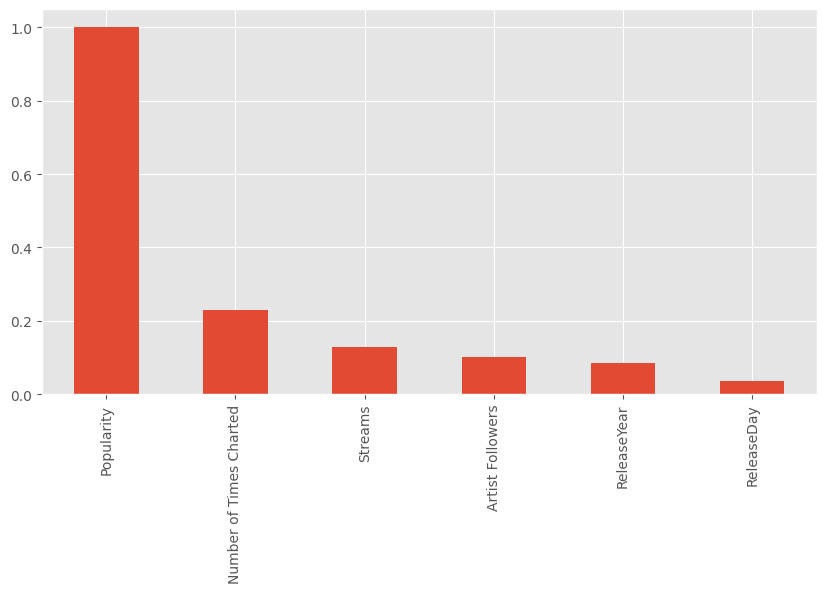

In [89]:
# Plot result
music_type1_2_numeric.corr()['Popularity'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

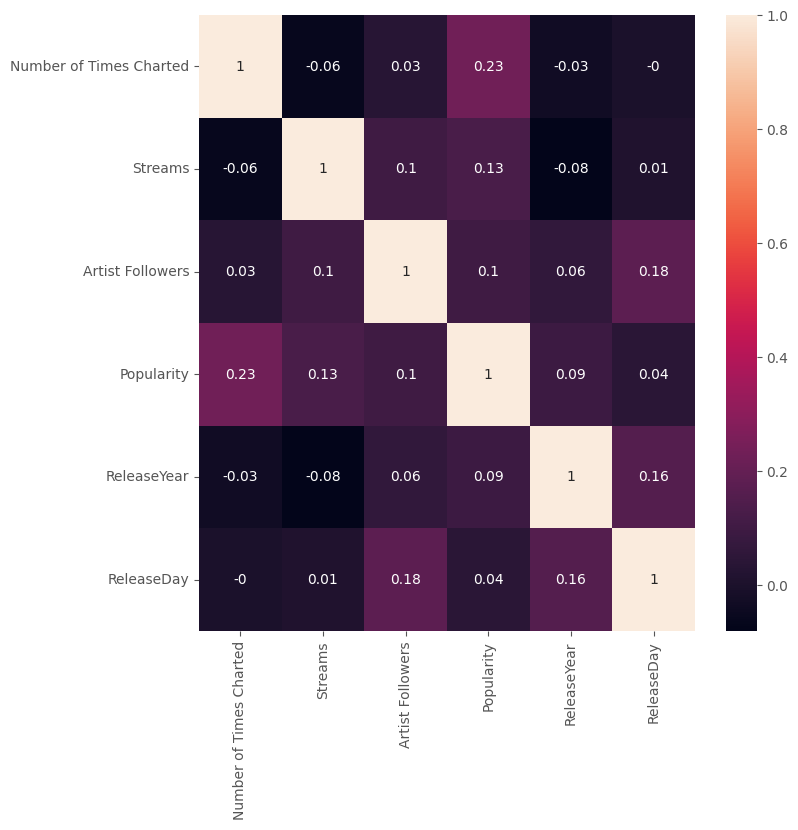

In [90]:
# Checking correlations between predictors (variables after cleaning)
plt.figure(figsize=(8,8))
correlation_matrix = music_type1_2_numeric.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Processing

In [93]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Set 1.3

In [94]:
X = music_type1_2_numeric.drop(['Popularity'], axis = 1)
y = music_type1_2_numeric['Popularity']


- To choose max_depths from the run test below

In [95]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,15.232181,1.115835
1,2,10.425606,1.109664
2,3,8.997217,0.683442
3,4,8.707319,0.651112
4,5,8.616253,0.659222
5,6,8.753428,0.783781
6,7,8.764901,0.721454
7,8,8.928051,0.771848
8,9,9.152784,0.747902
9,10,9.273660,0.788609


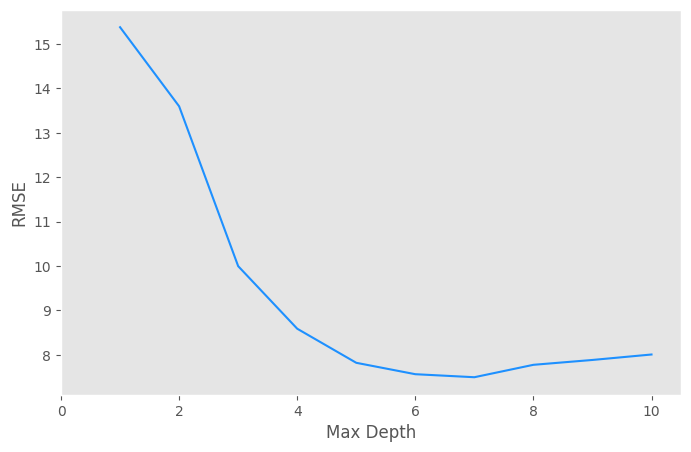

In [96]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [97]:
# Re run with max depth = 7
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=7 ) # max_depth = 7 gave the lowest RMSE
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")
print(f"Standard Deviation of RMSE: {rms_error.std():.2f}%")


CV RMSE: 7600.0
Standard Deviation of RMSE: 1.39%


In [99]:
# Choose max_depth = 7 due to the lowest RMSE as the plot shown above
numLoops = 500

rmsp_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

  # Initialize and train the Decision Tree Regressor model
  model = DecisionTreeRegressor(max_depth=7) # max_depth of 5 gave the lowest RMSE
  model.fit(X_train,y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Calculate RMSPE using the defined function
  percentage_error_set1 = np.where(y_test != 0, (y_test - y_pred) / y_test, 0)
  # Calculate the mean of the squared percentage errors
  mean_squared_percentage_error_set1 = np.mean(np.square(percentage_error_set1))
  # Take the square root to get RMSPE and multiply by 100
  rmsp_error[idx] = np.sqrt(mean_squared_percentage_error_set1) * 100

#rmsp_error.append(rmsp_error.mean())

# After the loop, calculate the mean RMSPE
print(f"CV RMSPE from linear regression (set 1.3): {rmsp_error.mean().round(2)}%")
print(f"Standard Deviation of RMSPE: {rmsp_error.std():.2f}%")



CV RMSPE from linear regression (set 1.3): 16.22%
Standard Deviation of RMSPE: 12.19%


# Data Visualization--Decision Trees

In [100]:
import graphviz
from IPython.display import display
from sklearn import tree


## Set 1.3--Tree

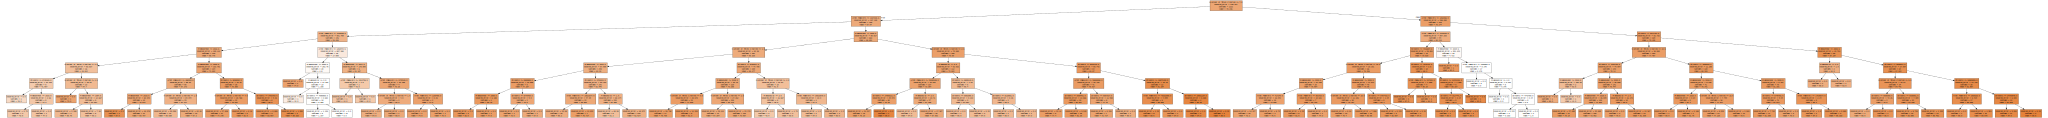

In [101]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)


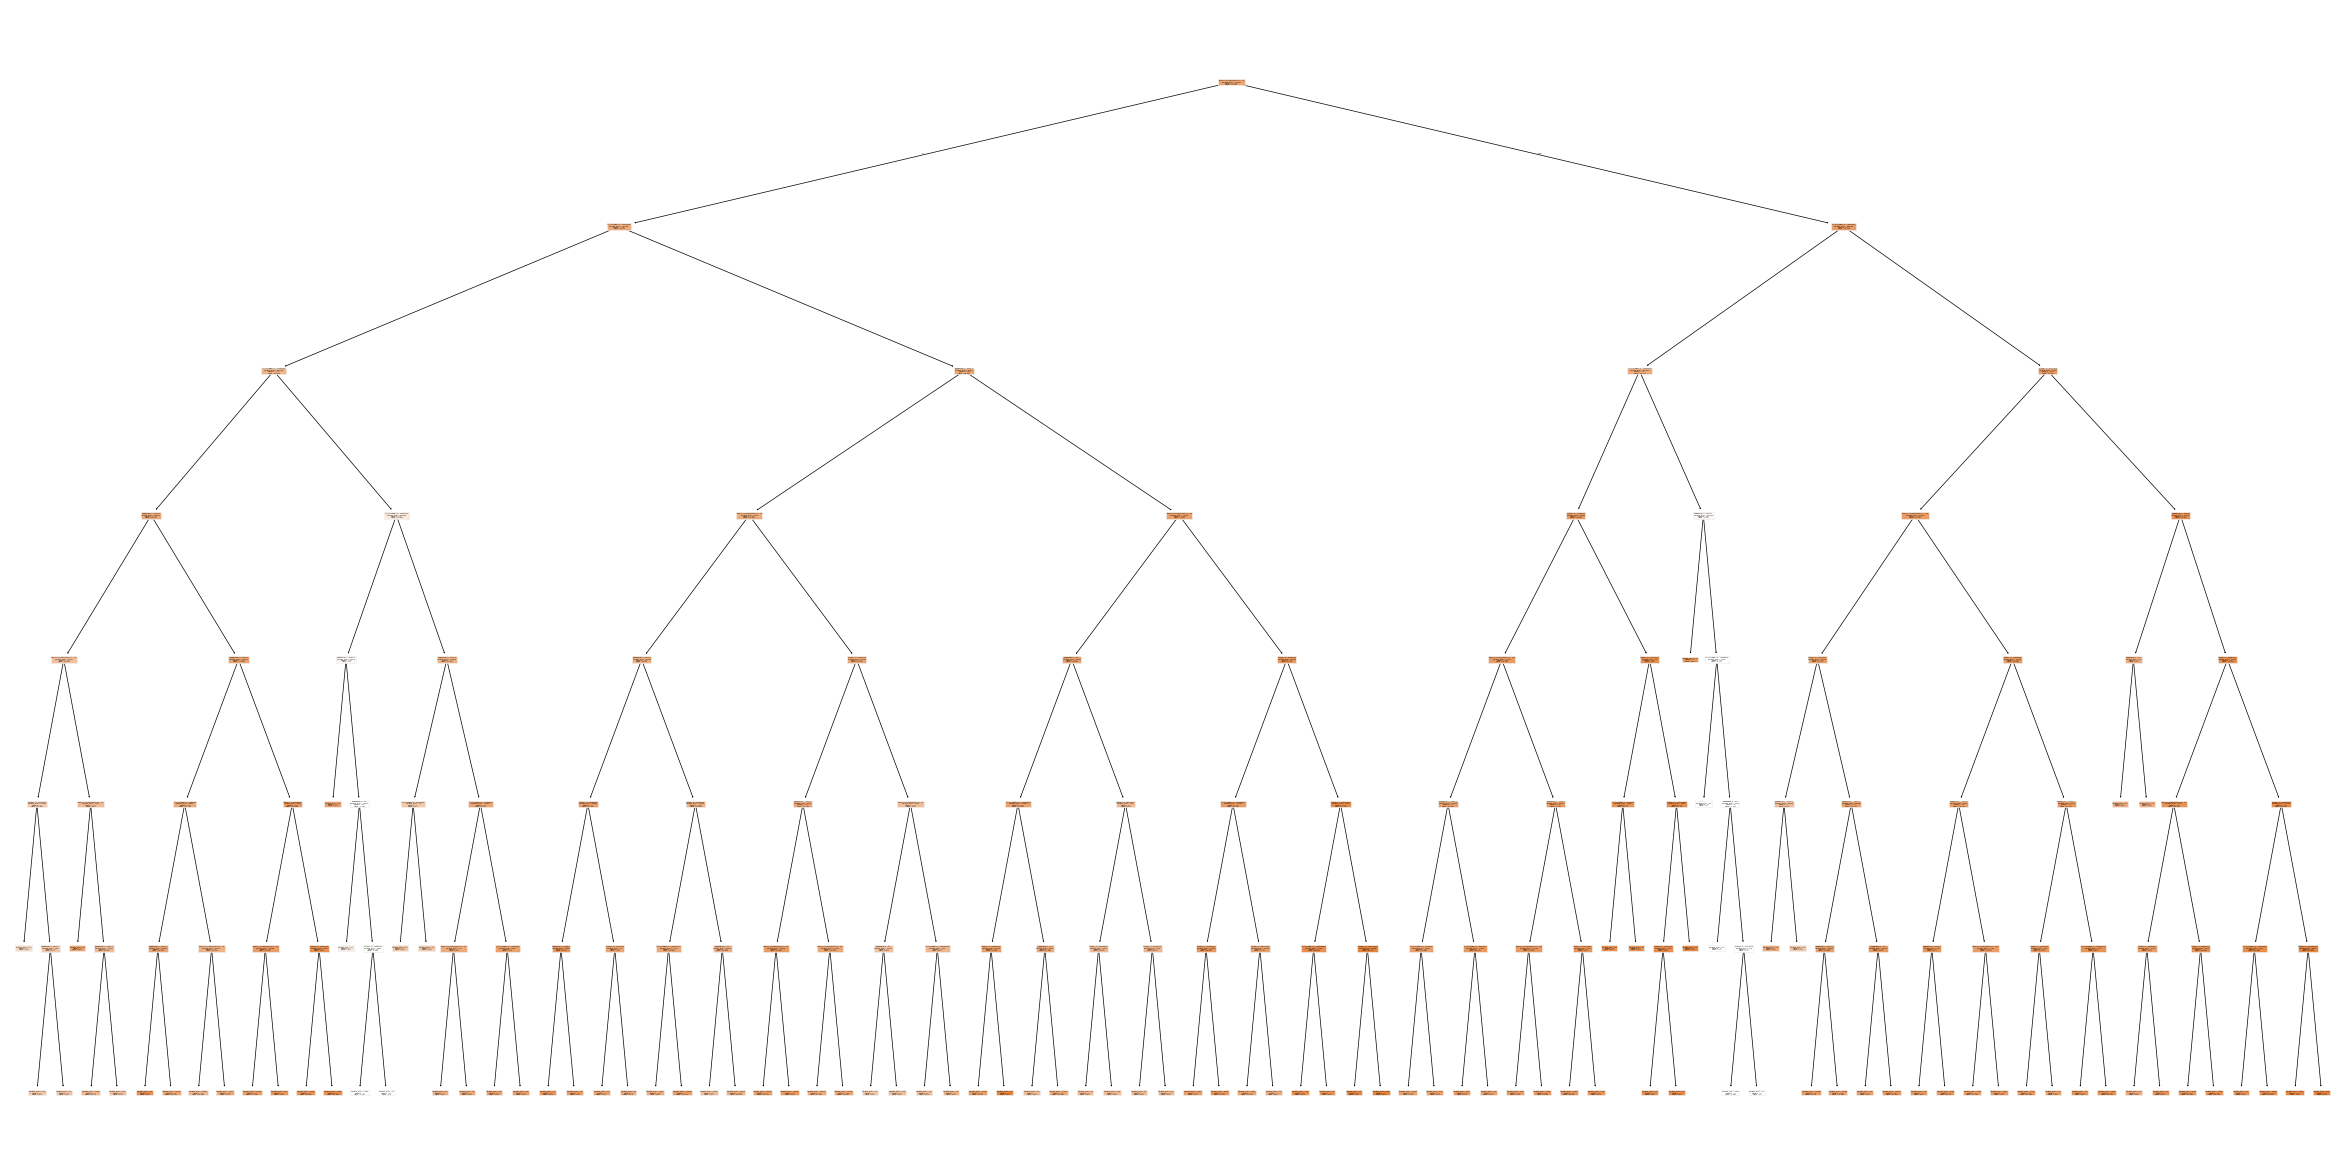

In [102]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)


# Conclusion

# Takeaways

# Future exploration